In [1]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib as mpl
import copy

import os, sys
import pickle as pkl
from scipy import interpolate
import scipy as sp

sys.path.append(r"C:\Users\mikek\OneDrive\Project\DLS\DLS-git")
from LRBv21 import LRBv21
from AnalyticCoolingCurves import *
from unpackConfigurationsMK import *
from refineGrid import refineGrid
from Morph import Profile, Morph

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))

from DLS.postprocess import *

from code_comparison.solps_pp import *
import general.plotstyle

%matplotlib inline

%load_ext autoreload
%autoreload 2


Text(0, 0.5, 'Zeff corrected $\\kappa_{0}$')

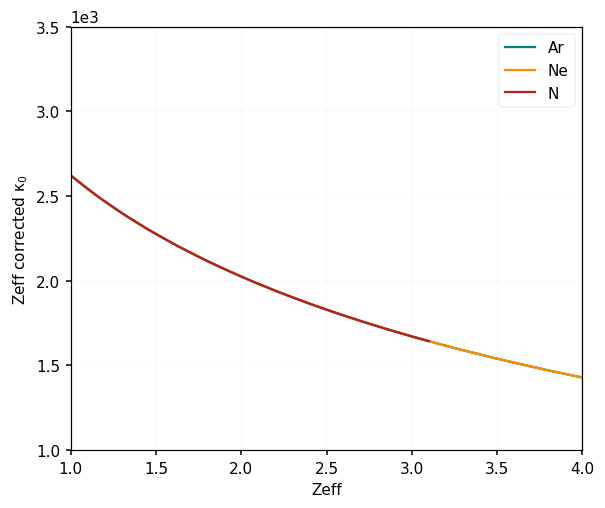

In [10]:
cz = np.linspace(0,0.05,100)

Z = dict(Ar = 18, Ne = 10, N = 7)

fig, ax = plt.subplots()

Zeff = {}
Kz = {}
for gas in Z:
    Zeff[gas] = 1 + Z[gas] * (Z[gas] - 1) * cz
    Kz[gas] = (3.9 + 2.3/Zeff[gas]) / (Zeff[gas] * (0.31 + 1.2/Zeff[gas] + 0.41/(Zeff[gas]**2)))
    # ax.plot(cz, Kz[gas]* 812, label = gas)
    ax.plot(Zeff[gas], Kz[gas]* 812, label = gas)
    # 
# ax.plot(Zeff["Ar"], Kz["Ar"])

ax.legend()
# ax.set_yscale("log")
# ax.set_xlabel(r"$f_{\alpha}$")
ax.set_xlabel(r"Zeff")
ax.set_xlim(1,4)
ax.set_ylim(1000,3500)
ax.set_ylabel("Zeff corrected $\kappa_{0}$")
